# Excercise 1: Autoencoder

We have allready seen a simple MLP model for **MNIST** classification:

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
layer1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
layer2 = layers.Flatten()(layer1)
layer3 = layers.Dense(128, activation="tanh")(layer2)
layer4 = layers.Dense(128, activation="tanh")(layer3)
outputs = layers.Dense(10, activation="softmax")(layer4)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=10)



Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 28, 28)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_48 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_49 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
____________________________________________________

Now we want to change this model and build an **autoencoder** for **MNIST**:

**1. change the network topology:** 
* use 5 dense layers to form "bottleneck" network (see lecture). 
* Layers 1+2 should be the encoder, 3 the lattent layer aner 4+5 the decoder
* remove the softmax (we are not doing a classification anymore)

**2. change the loss-function to compare input and output -> choose a suitable loss from https://keras.io/api/losses/**

**3. train the model**

**4. test the model**
* visualize input and output images to inspect the reconstruction quallity (use MATPLOTLIB *imshow*)
* implement a function to measure the reconstrunction error between in- and output
* change network size (number of neurons per layer) and training paramters to optimize the ressults 

**5. Outlier detection**
* plot a histogram over the the recostruction errors
* find a cutoff value and visualize the outliers

In [44]:
# Get data as numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

inputs = keras.Input(shape=(784, ))
layer1 = layers.Dense(70, activation = "relu")(inputs)
layer2 = layers.Dense(30, activation = "tanh")(layer1)
layer3 = layers.Dense(30, activation="tanh")(layer2)
layer4 = layers.Dense(70, activation="relu")(layer3)

outputs = layers.Dense(784, activation="sigmoid")(layer4)

model = keras.Model(inputs, outputs)
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_50 (Dense)             (None, 70)                54950     
_________________________________________________________________
dense_51 (Dense)             (None, 30)                2130      
_________________________________________________________________
dense_52 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_53 (Dense)             (None, 70)                2170      
_________________________________________________________________
dense_54 (Dense)             (None, 784)               55664     
Total params: 115,844
Trainable params: 115,844
Non-trainable params: 0
____________________________________________________

In [50]:
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
history = model.fit(x_train, x_train, verbose=2, epochs=10, batch_size=32 )

Epoch 1/10
1875/1875 - 6s - loss: 0.0079 - mse: 0.0079 - mae: 0.0292 - mape: 4856965.5000
Epoch 2/10
1875/1875 - 6s - loss: 0.0079 - mse: 0.0079 - mae: 0.0292 - mape: 4843997.5000
Epoch 3/10
1875/1875 - 6s - loss: 0.0079 - mse: 0.0079 - mae: 0.0291 - mape: 4830911.0000
Epoch 4/10
1875/1875 - 6s - loss: 0.0079 - mse: 0.0079 - mae: 0.0291 - mape: 4822602.5000
Epoch 5/10
1875/1875 - 6s - loss: 0.0079 - mse: 0.0079 - mae: 0.0291 - mape: 4806063.5000
Epoch 6/10
1875/1875 - 6s - loss: 0.0079 - mse: 0.0079 - mae: 0.0291 - mape: 4802874.0000
Epoch 7/10
1875/1875 - 7s - loss: 0.0079 - mse: 0.0079 - mae: 0.0291 - mape: 4790284.0000
Epoch 8/10
1875/1875 - 6s - loss: 0.0078 - mse: 0.0078 - mae: 0.0290 - mape: 4777542.5000
Epoch 9/10
1875/1875 - 6s - loss: 0.0078 - mse: 0.0078 - mae: 0.0290 - mape: 4770711.5000
Epoch 10/10
1875/1875 - 6s - loss: 0.0078 - mse: 0.0078 - mae: 0.0290 - mape: 4758145.0000


In [47]:
prediction = model.predict(x_train)

In [48]:
score = model.evaluate(x_train, x_train, verbose=1)
print(score[1]*100)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0293 - mape: 4887880.0000
0.7946297526359558


Original pictures:


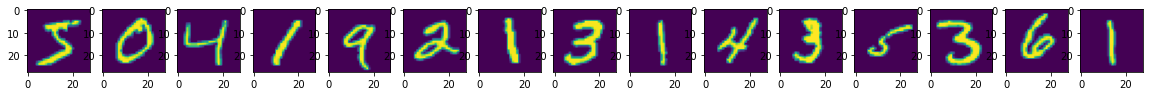

In [49]:
import matplotlib.pyplot as plt
amount_pictures = 15
plt.figure(figsize=(20, 5))

# display original pictures
print("Original pictures:")
for picture in range(amount_pictures):
  ax = plt.subplot(2, amount_pictures, picture + 1)
  plt.imshow(x_train[picture].reshape(28, 28))


Reconstructed pictures:


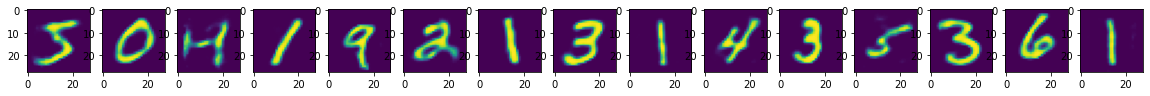

In [40]:
#display reconstruction
amount_pictures = 15
plt.figure(figsize=(20, 5))
print("Reconstructed pictures:")
for picture in range(amount_pictures):
  ax = plt.subplot(2, amount_pictures, picture + 1)
  plt.imshow(prediction[picture].reshape(28, 28))


In [58]:
 from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(novelty=True)
lof.fit(x_train)

# is running for 2 hours already ....

LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=True, p=2)

In [83]:
error = np.sum(np.abs(x_train-prediction))

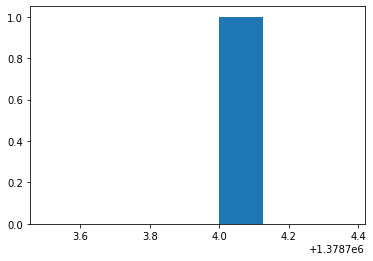

In [86]:
histogramm=plt.hist(error, bins=10)